# 1. Importando bibliotecas

In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web 
import seaborn as sns

!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
yf.pdr_override()

Requirement already up-to-date: yfinance in /usr/local/lib/python3.6/dist-packages (0.1.54)


# Obtendo os dados do mercado

In [2]:
ibov =  web.get_data_yahoo('^BVSP')



[*********************100%***********************]  1 of 1 completed


In [3]:
ibov.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1993-04-27,24.799999,25.400000,24.500000,24.500000,24.500000,0
1993-04-28,24.500000,24.600000,23.700001,24.299999,24.299999,0
1993-04-29,24.299999,24.799999,23.700001,23.700001,23.700001,0
1993-04-30,23.700001,24.200001,23.700001,24.100000,24.100000,0
1993-05-03,24.100000,24.400000,23.799999,24.100000,24.100000,0


In [4]:
ibov.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-05-04,80501.0,80502.0,77640.0,78876.0,78876.0,8594200
2020-05-05,78887.0,81066.0,78886.0,79471.0,79471.0,9154700
2020-05-06,79473.0,79996.0,78056.0,79064.0,79064.0,9775900
2020-05-07,79072.0,80061.0,78061.0,78119.0,78119.0,13808900
2020-05-08,78152.0,80557.0,78152.0,80263.0,80263.0,10734400


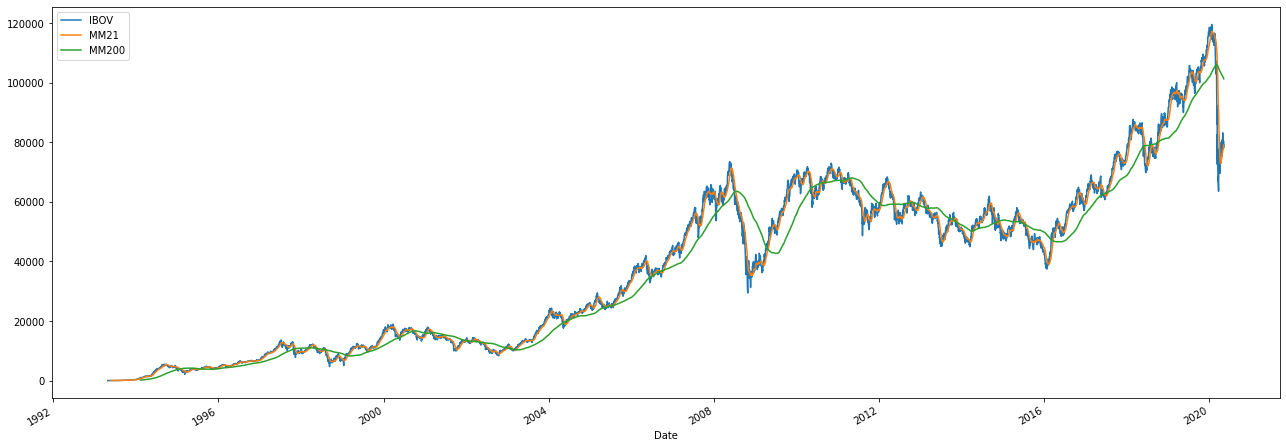

In [5]:
ibov['Close'].plot(figsize=(22,8),label = 'IBOV')
ibov['Close'].rolling(21).mean().plot(label = 'MM21')
ibov['Close'].rolling(200).mean().plot(label = 'MM200')
plt.legend()

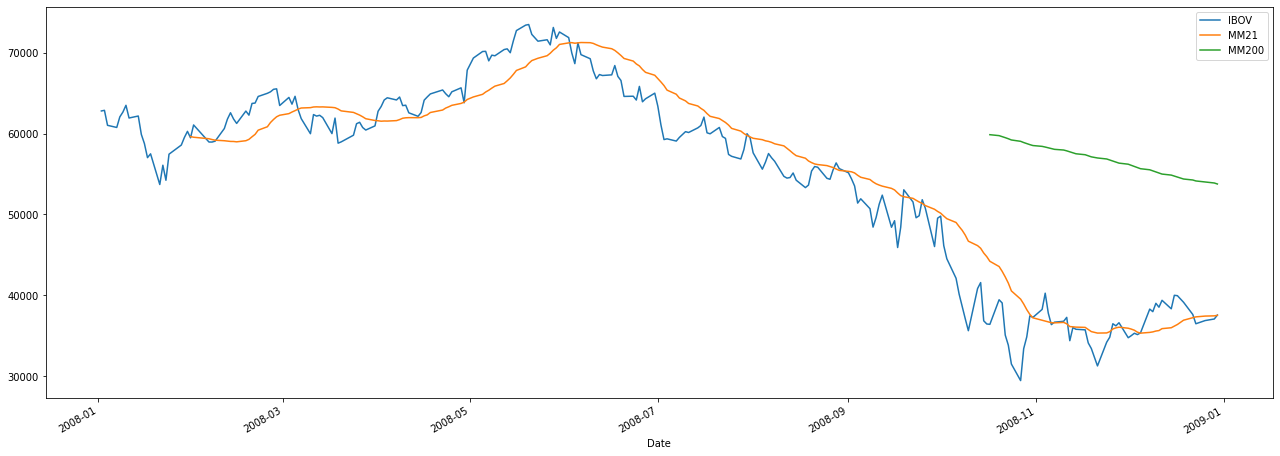

In [6]:
ibov_fatiado = ibov[ibov.index.year == 2008]
ibov_fatiado['Close'].plot(figsize=(22,8),label = 'IBOV')
ibov_fatiado['Close'].rolling(21).mean().plot(label = 'MM21')
ibov_fatiado['Close'].rolling(200).mean().plot(label = 'MM200')
plt.legend()

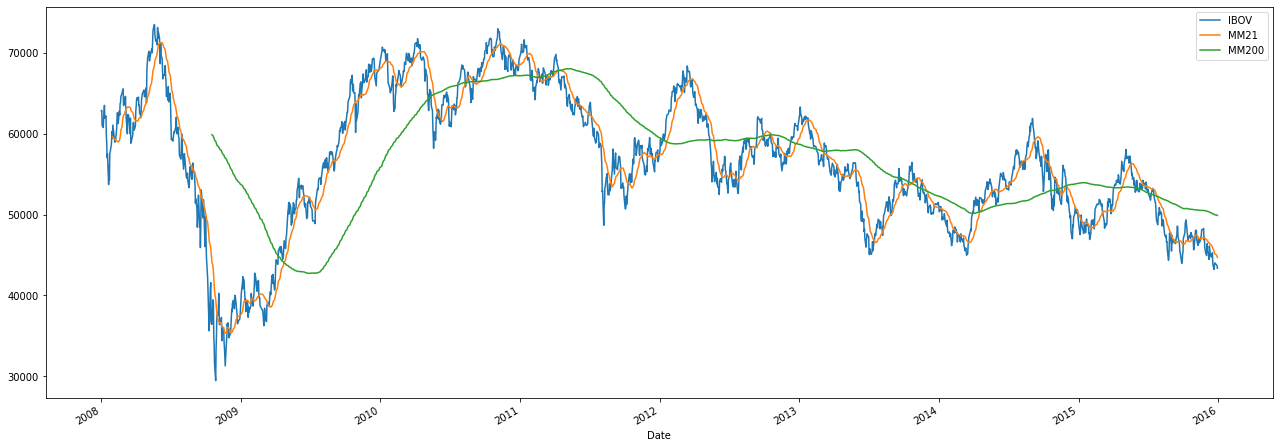

In [7]:
ibov_fatiado = ibov[(ibov.index.year >= 2008) & (ibov.index.year <= 2015)]
ibov_fatiado['Close'].plot(figsize=(22,8),label = 'IBOV')
ibov_fatiado['Close'].rolling(21).mean().plot(label = 'MM21')
ibov_fatiado['Close'].rolling(200).mean().plot(label = 'MM200')
plt.legend()

In [8]:
ibov_fatiado = ibov[ibov.index.month == 12]
ibov_fatiado.tail(20)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-28,85469.0,88044.0,85469.0,87887.0,87887.0,3649100
2019-12-02,108246.0,109279.0,108245.0,109061.0,109061.0,4708000
2019-12-03,108931.0,109198.0,108190.0,109005.0,109005.0,5223100
2019-12-04,108962.0,110301.0,108962.0,110301.0,110301.0,4889500
2019-12-05,110297.0,111073.0,110008.0,110622.0,110622.0,4399100
2019-12-06,110623.0,111430.0,110623.0,111126.0,111126.0,4968100
2019-12-09,111125.0,111453.0,110870.0,110977.0,110977.0,4991500
2019-12-10,110973.0,111184.0,110133.0,110672.0,110672.0,4758800
2019-12-11,110672.0,111227.0,110530.0,110964.0,110964.0,5146100


# 2. Calculando CORRELAÇÃO entre DÓLAR e IBOVESPA

# 2.1 Obtendo e tratando os dados

In [9]:
tickers = ['^BVSP','USDBRL=X']
carteira = web.get_data_yahoo(tickers,start='2007-01-01')['Close']

[*********************100%***********************]  2 of 2 completed


In [0]:
carteira = carteira.dropna()
carteira.columns = ['DOLAR','IBOV']

# 3. Resultados

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9070378cc0>,
      dtype=object)

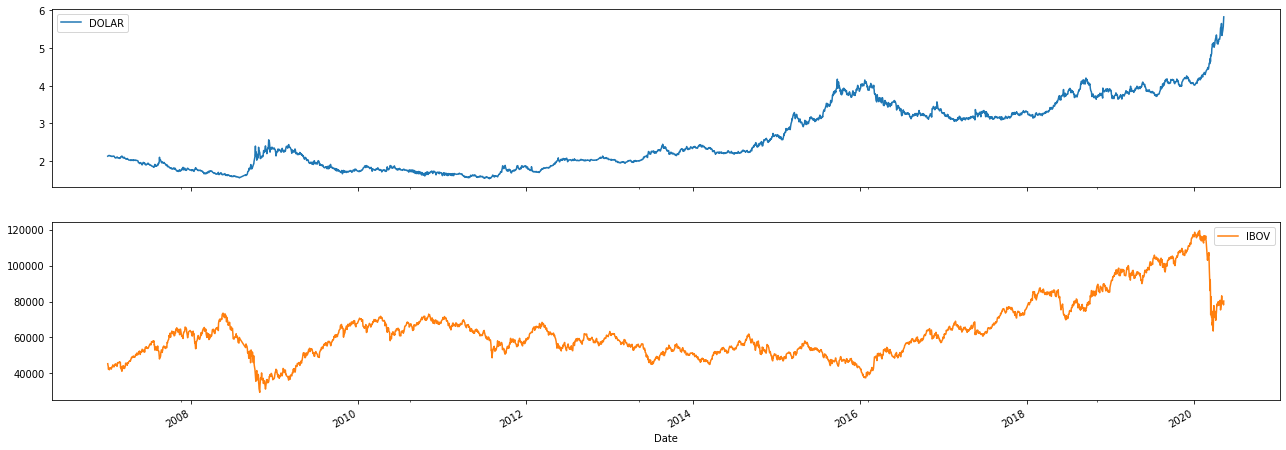

In [11]:
carteira.plot(subplots = True, figsize=(22,8))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f90705f0518>,
      dtype=object)

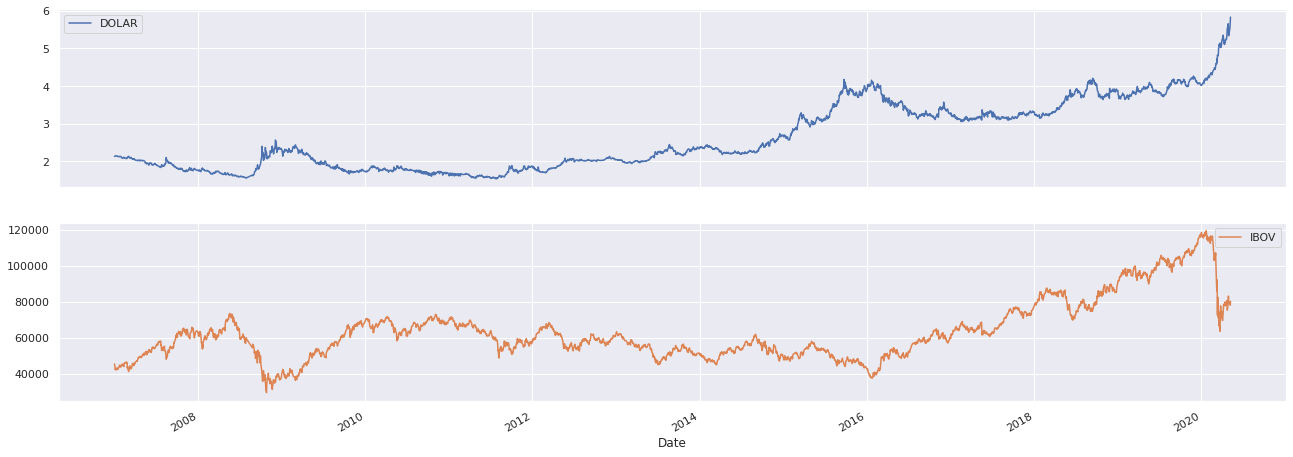

In [12]:
sns.set()
carteira.plot(subplots = True, figsize=(22,8))

In [13]:
carteira.corr()

,DOLAR,IBOV
DOLAR,1.000000,0.474874
IBOV,0.474874,1.000000


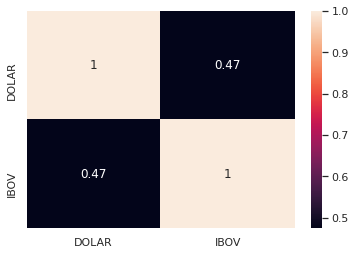

In [14]:
sns.heatmap(carteira.corr(), annot = True)

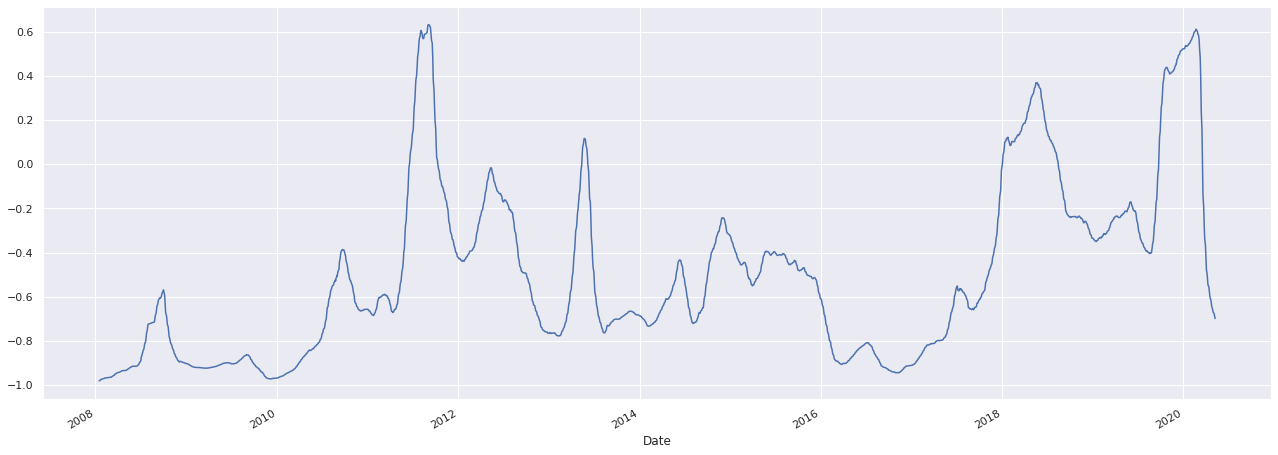

In [15]:
carteira['DOLAR'].rolling(252).corr(carteira['IBOV']).plot(figsize =(22,8))

In [0]:
carteira['IBOV_DOLARIZADO'] = (carteira['IBOV'] / carteira['DOLAR'])

In [17]:
carteira.head()

,DOLAR,IBOV,IBOV_DOLARIZADO
Date,,,
2007-01-02,2.1310,45383.0,21296.573959
2007-01-03,2.1345,44445.0,20822.206345
2007-01-04,2.1390,44020.0,20579.710732
2007-01-05,2.1470,42245.0,19676.291819
2007-01-08,2.1465,42830.0,19953.411504


# Simulando uma carteira de ações

In [18]:
tickers = ['ABEV3.SA','ITSA4.SA','WEGE3.SA','USIM5.SA','VALE3.SA']
carteira = web.get_data_yahoo(tickers, period = '5y')['Adj Close']
ibov = web.get_data_yahoo('^BVSP', period = '5y')['Adj Close']

[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  1 of 1 completed


In [19]:
carteira

,ABEV3.SA,ITSA4.SA,USIM5.SA,VALE3.SA,WEGE3.SA
Date,,,,,
2015-05-08,17.229460,5.781542,5.761515,19.875904,11.690017
2015-05-11,17.099457,5.799405,5.887609,20.338945,11.773015
2015-05-12,16.848124,5.745818,5.722717,19.508965,11.862937
2015-05-13,16.900126,5.638643,5.441431,18.871189,11.731561
2015-05-14,16.813457,5.686276,5.325037,18.635294,12.042786
...,...,...,...,...,...
2020-05-04,11.760000,8.700000,4.680000,43.930000,39.840000
2020-05-05,11.940000,8.910000,4.610000,43.700001,39.009998
2020-05-06,11.830000,8.700000,4.590000,44.330002,38.830002


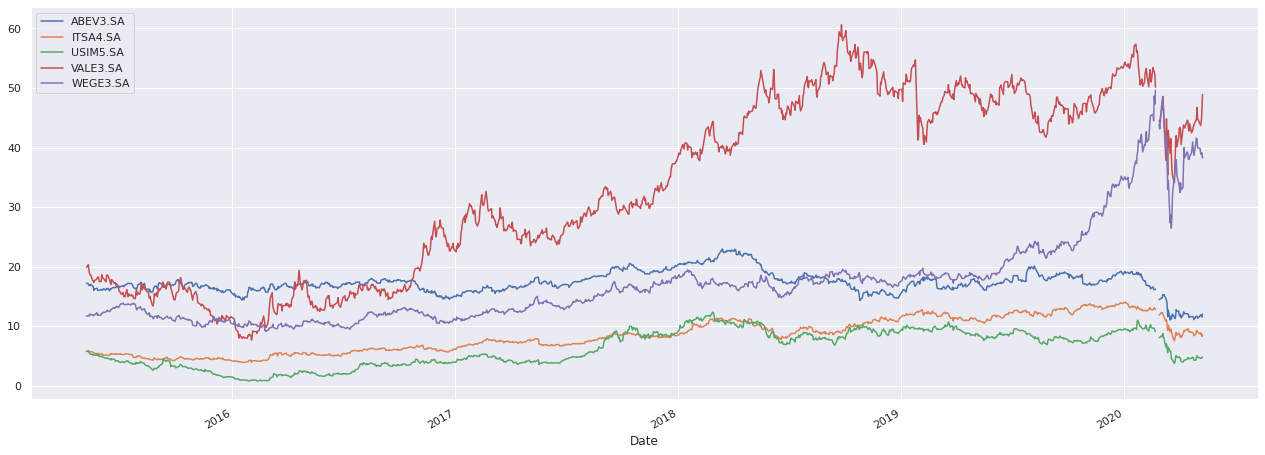

In [20]:
sns.set()
carteira.plot(figsize=(22,8))

In [0]:
carteira_normalizada = (carteira / carteira.iloc[0])*10000
carteira_normalizada.dropna(inplace=True)

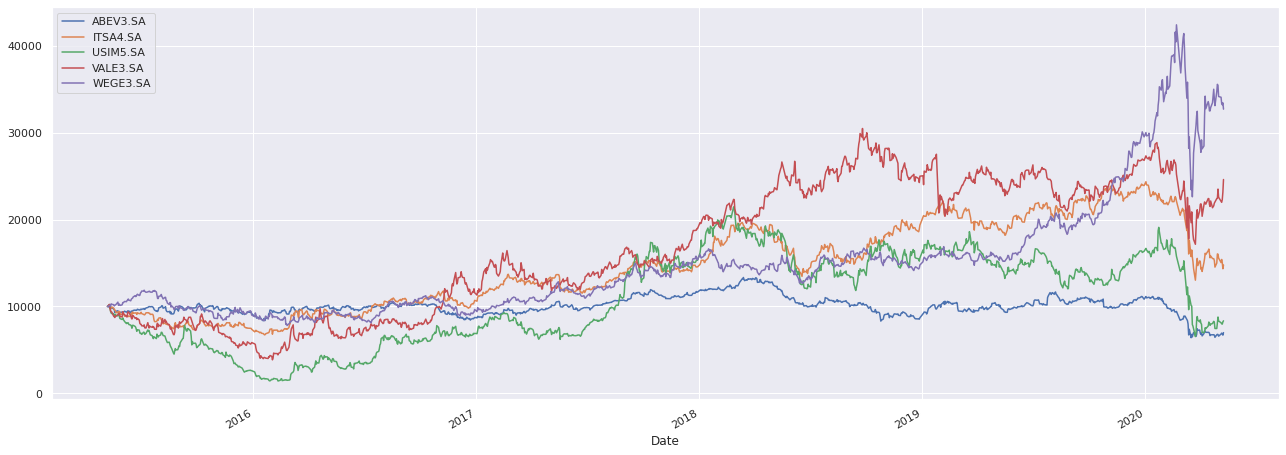

In [22]:
carteira_normalizada.plot(figsize=(22,8))

In [0]:
carteira_normalizada['saldo'] = carteira_normalizada.sum(axis = 1)

In [24]:
ibov_normalizado = (ibov / ibov.iloc[0])*50000
ibov_normalizado

Date
2015-05-08    50000.000000
2015-05-11    50041.995485
2015-05-12    49687.658577
2015-05-13    49320.198079
2015-05-14    49569.546274
                  ...     
2020-05-04    69009.081524
2020-05-05    69529.650563
2020-05-06    69173.563842
2020-05-07    68346.777721
2020-05-08    70222.576073
Name: Adj Close, Length: 1236, dtype: float64

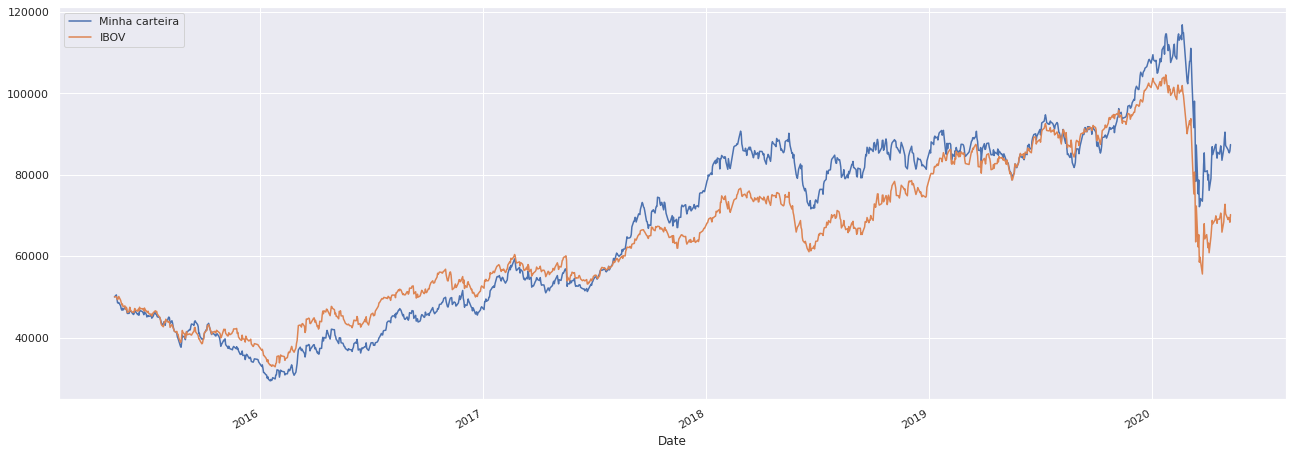

In [25]:
carteira_normalizada['saldo'].plot(figsize=(22,8), label = 'Minha carteira')
ibov_normalizado.plot(label = 'IBOV')
plt.legend()

In [26]:
!pip install pyfolio

     |████████████████████████████████| 92kB 2.3MB/s 
     |████████████████████████████████| 51kB 4.4MB/s 
  Created wheel for pyfolio: filename=pyfolio-0.9.2-cp36-none-any.whl size=88668 sha256=65205c1c54e821975b6edc2c9de8d6b6c3a8b7bb9c7d3568b5e63e874db52f34
  Stored in directory: /root/.cache/pip/wheels/0d/a8/7d/ac33fe6bf6f3db370291c9de303460d00b8f97cc40a1d80f72
  Created wheel for empyrical: filename=empyrical-0.5.3-cp36-none-any.whl size=37087 sha256=4f767be790069328486eeb0f5c32c6855ea7a456ffce75719d2c820c94111758
  Stored in directory: /root/.cache/pip/wheels/10/a4/3b/951bd609878a82fd72b9ea23699daf1eaada4ff6f583152876
Successfully built pyfolio empyrical


In [27]:
import pyfolio as pf
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/pyfolio/pos.py:28: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  ' to position notionals.'


In [28]:
tickers = ['ABEV3.SA','ITSA4.SA','WEGE3.SA','USIM5.SA','VALE3.SA','^BVSP']
dados_yahoo = web.get_data_yahoo(tickers, period='5y')['Adj Close']

[*********************100%***********************]  6 of 6 completed


In [29]:
dados_yahoo.head()

,ABEV3.SA,ITSA4.SA,USIM5.SA,VALE3.SA,WEGE3.SA,^BVSP
Date,,,,,,
2015-05-08,17.229460,5.781542,5.761515,19.875904,11.690017,57149.0
2015-05-11,17.099457,5.799405,5.887609,20.338945,11.773015,57197.0
2015-05-12,16.848124,5.745818,5.722717,19.508965,11.862937,56792.0
2015-05-13,16.900126,5.638643,5.441431,18.871189,11.731561,56372.0
2015-05-14,16.813457,5.686276,5.325037,18.635294,12.042786,56657.0


In [30]:
retorno = dados_yahoo.pct_change()
retorno.head()

,ABEV3.SA,ITSA4.SA,USIM5.SA,VALE3.SA,WEGE3.SA,^BVSP
Date,,,,,,
2015-05-08,NaN,NaN,NaN,NaN,NaN,NaN
2015-05-11,-0.007545,0.003090,0.021886,0.023297,0.007100,0.000840
2015-05-12,-0.014698,-0.009240,-0.028007,-0.040807,0.007638,-0.007081
2015-05-13,0.003087,-0.018653,-0.049153,-0.032691,-0.011075,-0.007395
2015-05-14,-0.005128,0.008448,-0.021390,-0.012500,0.026529,0.005056


In [31]:
retorno_acumulado = (1 + retorno).cumprod()
retorno_acumulado.iloc[0] = 1
retorno_acumulado.head(20)

,ABEV3.SA,ITSA4.SA,USIM5.SA,VALE3.SA,WEGE3.SA,^BVSP
Date,,,,,,
2015-05-08,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2015-05-11,0.992455,1.003090,1.021886,1.023297,1.007100,1.000840
2015-05-12,0.977867,0.993821,0.993266,0.981538,1.014792,0.993753
2015-05-13,0.980885,0.975284,0.944444,0.949451,1.003554,0.986404
2015-05-14,0.975855,0.983522,0.924242,0.937582,1.030177,0.991391
2015-05-15,0.989437,0.993821,0.917508,0.935385,1.024854,1.001750
2015-05-18,0.969819,0.981463,0.917508,0.889670,1.020708,0.983464
2015-05-19,0.967807,0.966015,0.883838,0.884396,1.005915,0.971128
2015-05-20,0.929578,0.956746,0.902357,0.872527,1.013015,0.960664


In [0]:
carteira = 10000 * retorno_acumulado.iloc[:,:5]
carteira['saldo'] = carteira.sum(axis = 1)
carteira['retorno'] = carteira['saldo'].pct_change()


In [33]:
carteira.head(20)

,ABEV3.SA,ITSA4.SA,USIM5.SA,VALE3.SA,WEGE3.SA,saldo,retorno
Date,,,,,,,
2015-05-08,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,50000.000000,NaN
2015-05-11,9924.546110,10030.897076,10218.856218,10232.966160,10070.999279,50478.264843,0.009565
2015-05-12,9778.671985,9938.209972,9932.660326,9815.384728,10147.921283,49612.848293,-0.017144
2015-05-13,9808.853984,9752.835765,9444.444582,9494.506030,10035.537982,48536.178343,-0.021701
2015-05-14,9758.551760,9835.224943,9242.423904,9375.822042,10301.769369,48513.792018,-0.000461
2015-05-15,9894.366326,9938.209972,9175.083402,9353.846547,10248.536634,48610.042880,0.001984
2015-05-18,9698.188870,9814.629916,9175.083402,8896.703465,10207.075927,47791.681579,-0.016835
2015-05-19,9678.067537,9660.151135,8838.384202,8843.956518,10059.153829,47079.713221,-0.014897
2015-05-20,9295.775505,9567.464031,9023.569341,8725.274449,10130.153107,46742.236434,-0.007168


In [0]:
retorno.dropna(inplace=True)

In [35]:
retorno.isna().sum()

ABEV3.SA    0
ITSA4.SA    0
USIM5.SA    0
VALE3.SA    0
WEGE3.SA    0
^BVSP       0
dtype: int64

In [0]:
# pf.create_full_tear_sheet(carteira["retorno"], benchmark_rets=retorno["^BVSP"])


(0.8, 1.4)

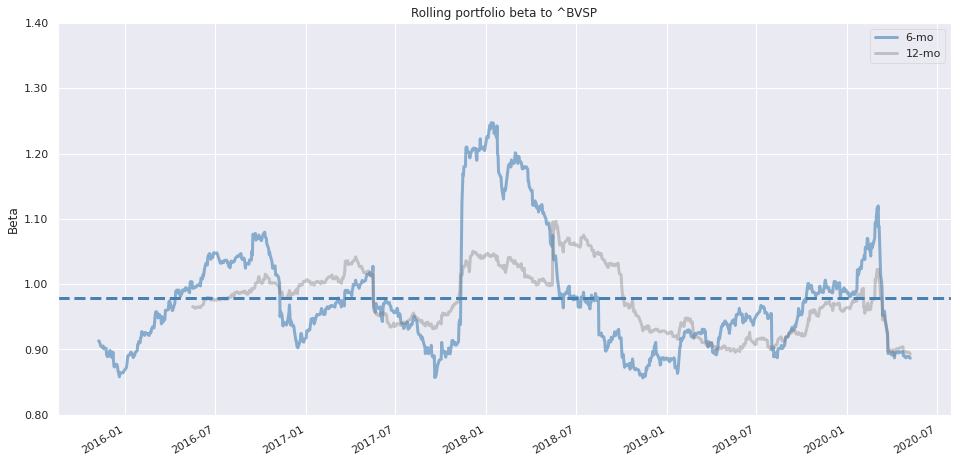

In [36]:
fig, ax1 = plt.subplots(figsize = (16,8))
pf.plot_rolling_beta(carteira['retorno'], factor_returns=retorno['^BVSP'], ax = ax1)
plt.ylim((0.8,1.4))

# 4. Simulando uma carteira aleatória

In [0]:
import random

In [0]:
#Obtendo os tickers
import bs4
import urllib.request as urllib_request
from urllib.request import urlopen
from bs4 import BeautifulSoup


In [0]:
# response = urlopen('https://finance.yahoo.com/quote/%5EBVSP/components?p=%5EBVSP')
# html = response.read().decode('utf-8')
# soup = BeautifulSoup(html, 'html.parser')
# soup


In [0]:
# table = soup.find('div',{'class': "Ovx(a) W(100%)"})
# table

In [40]:
def salva_tickers():
  response = urlopen('https://finance.yahoo.com/quote/%5EBVSP/components?p=%5EBVSP')
  html = response.read().decode('utf-8')
  soup = BeautifulSoup(html, 'html.parser')
  div = soup.find('div',{'class': "Ovx(a) W(100%)"})
  tickers = []
  for row in div.findAll('tr')[1:]:
    ticker = row.findAll('td')[0].getText()
    tickers.append(ticker)
  return tickers

tickers_ibov = salva_tickers()
tickers_ibov

['CCRO3.SA',
 'VALE5.SA',
 'PCAR4.SA',
 'ECOR3.SA',
 'BRKM5.SA',
 'LAME4.SA',
 'BRML3.SA',
 'ENBR3.SA',
 'BBSE3.SA',
 'RADL3.SA',
 'TIMP3.SA',
 'USIM5.SA',
 'VIVT4.SA',
 'LREN3.SA',
 'OIBR4.SA',
 'MULT3.SA',
 'ITSA4.SA',
 'BBAS3.SA',
 'JBSS3.SA',
 'SBSP3.SA',
 'CMIG4.SA',
 'KLBN11.SA',
 'UGPA3.SA',
 'BBDC3.SA',
 'BBDC4.SA',
 'EQTL3.SA',
 'TBLE3.SA',
 '656690',
 'PETR4.SA',
 'PETR3.SA']

In [41]:
tickers_ibov = "ABEV3.SA AZUL4.SA B3SA3.SA BBAS3.SA BBDC3.SA BBDC4.SA BBSE3.SA BPAC11.SA BRAP4.SA BRDT3.SA BRFS3.SA BRKM5.SA BRML3.SA BTOW3.SA CCRO3.SA CIEL3.SA CMIG4.SA COGN3.SA CRFB3.SA CSAN3.SA CSNA3.SA CVCB3.SA CYRE3.SA ECOR3.SA EGIE3.SA ELET3.SA ELET6.SA EMBR3.SA ENBR3.SA EQTL3.SA FLRY3.SA GGBR4.SA GNDI3.SA GOAU4.SA GOLL4.SA HAPV3.SA HGTX3.SA HYPE3.SA IGTA3.SA IRBR3.SA ITSA4.SA ITUB4.SA JBSS3.SA KLBN11.SA LAME4.SA LREN3.SA MGLU3.SA MRFG3.SA MRVE3.SA MULT3.SA NTCO3.SA PCAR4.SA PETR3.SA PETR4.SA QUAL3.SA RADL3.SA RAIL3.SA RENT3.SA SANB11.SA SBSP3.SA SMLS3.SA SULA11.SA SUZB3.SA TAEE11.SA TIMP3.SA TOTS3.SA UGPA3.SA USIM5.SA VALE3.SA VIVT4.SA VVAR3.SA WEGE3.SA YDUQ3.SA"

dados_yahoo = yf.download(tickers = tickers_ibov, period = '1y')['Adj Close']

ibov = yf.download('BOVA11.SA', period = '1y')['Adj Close']
ibov = ibov/ibov.iloc[0]

[*********************100%***********************]  73 of 73 completed
[*********************100%***********************]  1 of 1 completed


In [42]:
dados_yahoo.shape

(250, 73)

In [0]:
# Removendo dados faltantes
# how = 'all' remove a linha ou coluna quando todos os dados são NA

dados_yahoo.dropna(how='all', inplace = True)
dados_yahoo.dropna(axis = 1, inplace = True,thresh = 246)

In [44]:
dados_yahoo.shape

(249, 66)

In [45]:
retorno = dados_yahoo.pct_change()
retorno

,ABEV3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,BRAP4.SA,BRDT3.SA,BRFS3.SA,BRKM5.SA,BRML3.SA,BTOW3.SA,CCRO3.SA,CIEL3.SA,CMIG4.SA,COGN3.SA,CRFB3.SA,CSAN3.SA,CSNA3.SA,CVCB3.SA,CYRE3.SA,ECOR3.SA,EGIE3.SA,ELET3.SA,ELET6.SA,EMBR3.SA,ENBR3.SA,EQTL3.SA,FLRY3.SA,GGBR4.SA,GNDI3.SA,GOAU4.SA,GOLL4.SA,HAPV3.SA,HGTX3.SA,HYPE3.SA,IGTA3.SA,IRBR3.SA,ITSA4.SA,ITUB4.SA,JBSS3.SA,LAME4.SA,LREN3.SA,MGLU3.SA,MRFG3.SA,MRVE3.SA,MULT3.SA,PETR3.SA,PETR4.SA,QUAL3.SA,RADL3.SA,RAIL3.SA,RENT3.SA,SBSP3.SA,SMLS3.SA,SUZB3.SA,TIMP3.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VIVT4.SA,VVAR3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-05-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-09,-0.023996,0.027027,-0.013101,0.008697,-0.019689,-0.017468,0.006927,-0.002616,0.024686,0.011188,-0.073600,0.004922,-0.033422,-0.003290,-0.016624,-0.005727,0.022340,-0.030189,-0.022531,-0.001402,0.000000,0.008182,0.021557,0.004745,-0.010639,-0.009641,0.001564,0.009174,0.009899,-0.021266,-0.017931,-0.014416,-0.013158,0.013051,0.028051,-0.004630,-0.014696,-0.012821,0.000000,-0.004333,-0.012436,0.031746,0.029414,-0.025836,-0.039277,-0.037037,0.044876,-0.003704,-0.028458,-0.019730,0.014681,-0.011285,-0.015882,-0.010354,-0.008299,0.000000,0.069767,-0.001826,0.017722,0.003221,-0.008158,-0.009388,-0.005465,0.046358,-0.003224,0.021970
2019-05-10,-0.010863,0.002368,-0.017699,-0.017049,-0.010207,-0.008890,0.017379,0.022623,-0.022050,-0.027660,-0.011843,-0.004082,-0.065008,0.018977,-0.019506,-0.007919,0.050989,-0.027237,0.011525,0.009825,-0.085763,-0.005797,0.019930,0.005195,-0.026111,-0.028319,0.004165,-0.011932,0.005335,-0.014321,-0.006320,0.023582,0.000000,0.026570,-0.015471,0.004651,0.026708,-0.004675,0.015877,-0.003481,-0.004607,-0.037019,-0.037461,0.007299,0.003228,-0.020000,-0.000641,-0.011978,-0.000341,-0.005591,0.003896,-0.003951,-0.004035,0.011564,-0.041841,0.001127,-0.087183,-0.003660,0.028068,-0.004587,-0.009401,0.018953,-0.003736,-0.027426,-0.006469,0.021139
2019-05-13,-0.016763,-0.039118,-0.028829,-0.035686,-0.028609,-0.024884,-0.003559,-0.046169,-0.015449,0.003347,-0.069913,-0.032787,-0.044378,-0.017004,-0.023873,-0.039913,-0.009901,-0.010000,-0.006032,-0.047255,-0.076837,-0.026239,-0.042529,-0.005403,-0.050473,-0.024287,-0.019699,-0.015526,-0.021227,-0.018036,-0.024028,0.019248,-0.032593,-0.070196,-0.005714,-0.021914,-0.015203,-0.010699,-0.031953,-0.017467,-0.015736,-0.014478,-0.017150,-0.022947,-0.034745,-0.007849,-0.012829,-0.030518,-0.028620,-0.029235,-0.032705,-0.007639,-0.009838,-0.047361,-0.069869,-0.033784,-0.054081,-0.026630,0.003152,-0.032258,-0.029656,-0.041043,-0.009486,0.026030,-0.023332,-0.007018
2019-05-14,-0.004115,-0.039617,0.008039,-0.009717,-0.008563,-0.002967,0.021429,-0.001681,-0.026718,0.042695,0.035973,0.010169,-0.009290,0.006590,0.004076,0.011338,-0.004000,0.012121,-0.006518,0.045223,0.033737,-0.005988,0.006002,-0.012754,0.068438,0.040759,0.001058,0.007593,0.008952,0.007143,0.010138,0.044349,0.016845,-0.027836,0.000287,-0.024929,-0.001715,-0.008177,0.006540,0.001778,-0.004702,0.083587,0.013422,-0.009889,-0.009834,0.026899,0.013645,-0.008625,0.000351,0.003861,0.013180,0.000000,0.002338,0.027714,0.014319,-0.031469,-0.017834,0.003774,-0.033108,0.011905,-0.003668,0.003373,0.000000,-0.038055,0.000556,-0.005300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-04,0.037037,-0.128736,-0.001041,-0.025965,-0.038155,-0.044386,-0.047081,-0.031815,0.004249,-0.051057,-0.001892,-0.068725,0.011195,-0.013765,-0.029557,-0.029412,-0.057762,0.002000,-0.013424,-0.080

In [46]:
retorno_acumulado = (1 + retorno).cumprod()
retorno_acumulado.iloc[0] = 1
retorno_acumulado

,ABEV3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,BRAP4.SA,BRDT3.SA,BRFS3.SA,BRKM5.SA,BRML3.SA,BTOW3.SA,CCRO3.SA,CIEL3.SA,CMIG4.SA,COGN3.SA,CRFB3.SA,CSAN3.SA,CSNA3.SA,CVCB3.SA,CYRE3.SA,ECOR3.SA,EGIE3.SA,ELET3.SA,ELET6.SA,EMBR3.SA,ENBR3.SA,EQTL3.SA,FLRY3.SA,GGBR4.SA,GNDI3.SA,GOAU4.SA,GOLL4.SA,HAPV3.SA,HGTX3.SA,HYPE3.SA,IGTA3.SA,IRBR3.SA,ITSA4.SA,ITUB4.SA,JBSS3.SA,LAME4.SA,LREN3.SA,MGLU3.SA,MRFG3.SA,MRVE3.SA,MULT3.SA,PETR3.SA,PETR4.SA,QUAL3.SA,RADL3.SA,RAIL3.SA,RENT3.SA,SBSP3.SA,SMLS3.SA,SUZB3.SA,TIMP3.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VIVT4.SA,VVAR3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-05-08,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2019-05-09,0.976004,1.027027,0.986899,1.008697,0.980311,0.982532,1.006927,0.997384,1.024686,1.011188,0.926400,1.004922,0.966578,0.996710,0.983376,0.994273,1.022340,0.969811,0.977469,0.998598,1.000000,1.008182,1.021557,1.004745,0.989361,0.990359,1.001564,1.009174,1.009899,0.978734,0.982069,0.985584,0.986842,1.013051,1.028051,0.995370,0.985304,0.987179,1.000000,0.995667,0.987564,1.031746,1.029414,0.974164,0.960723,0.962963,1.044876,0.996296,0.971542,0.980270,1.014681,0.988715,0.984118,0.989646,0.991701,1.000000,1.069767,0.998174,1.017722,1.003221,0.991842,0.990612,0.994535,1.046358,0.996776,1.021970
2019-05-10,0.965402,1.029459,0.969432,0.991500,0.970306,0.973797,1.024426,1.019948,1.002092,0.983218,0.915429,1.000820,0.903743,1.015625,0.964194,0.986399,1.074468,0.943396,0.988734,1.008409,0.914237,1.002338,1.041916,1.009964,0.963527,0.962314,1.005735,0.997133,1.015286,0.964717,0.975862,1.008826,0.986842,1.039967,1.012146,1.000000,1.011620,0.982564,1.015877,0.992201,0.983015,0.993552,0.990851,0.981275,0.963824,0.943704,1.044206,0.984362,0.971211,0.974790,1.018634,0.984809,0.980148,1.001090,0.950207,1.001127,0.976502,0.994521,1.046288,0.998619,0.982517,1.009388,0.990820,1.017660,0.990328,1.043574
2019-05-13,0.949219,0.989189,0.941485,0.956118,0.942546,0.949566,1.020780,0.972858,0.986611,0.986509,0.851429,0.968007,0.863637,0.998355,0.941177,0.947029,1.063830,0.933962,0.982770,0.960757,0.843990,0.976038,0.997605,1.004508,0.914895,0.938942,0.985923,0.981651,0.993735,0.947318,0.952414,1.028244,0.954678,0.966966,1.006362,0.978086,0.996241,0.972051,0.983417,0.974870,0.967546,0.979167,0.973859,0.958758,0.930336,0.936296,1.030810,0.954321,0.943415,0.946291,0.985319,0.977286,0.970505,0.953677,0.883817,0.967306,0.923692,0.968037,1.049585,0.966406,0.953380,0.967959,0.981421,1.044150,0.967222,1.036250
2019-05-14,0.945312,0.950000,0.949054,0.946828,0.934476,0.946748,1.042654,0.971223,0.960251,1.028628,0.882057,0.977851,0.855613,1.004934,0.945013,0.957767,1.059574,0.945283,0.976364,1.004205,0.872464,0.970193,1.003593,0.991696,0.977508,0.977213,0.986966,0.989105,1.002631,0.954084,0.962069,1.073845,0.970760,0.940049,1.006651,0.953704,0.994532,0.964102,0.989848,0.976603,0.962997,1.061012,0.986929,0.949277,0.921187,0.961481,1.044876,0.946090,0.943746,0.949945,0.998306,0.977286,0.972774,0.980107,0.896473,0.936866,0.907219,0.971690,1.014836,0.977911,0.949883,0.971225,0.981421,1.004415,0.967759,1.030758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-04,0.673486,0.409730,1.152739,0.5

In [47]:
import random
carteira = random.sample(list(dados_yahoo.columns), k = 5)
carteira = 10000 *  retorno_acumulado.loc[:,carteira]
carteira

,BBSE3.SA,CRFB3.SA,MRFG3.SA,TIMP3.SA,YDUQ3.SA
Date,,,,,
2019-05-08,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
2019-05-09,10069.268204,9698.112816,9629.629630,9981.735610,10219.700000
2019-05-10,10244.258770,9433.962213,9437.036867,9945.205931,10435.738250
2019-05-13,10207.802272,9339.622126,9362.963217,9680.365979,10362.504679
2019-05-14,10426.541260,9452.830048,9614.814476,9716.895658,10307.579857
...,...,...,...,...,...
2020-05-04,10341.453489,9572.152934,18474.074470,12687.864706,10643.649636
2020-05-05,10177.952399,9486.175370,18518.518519,13112.365582,10759.300727
2020-05-06,10022.626558,9495.727724,18799.999378,12819.932025,10460.846069


In [48]:
carteira['saldo'] = carteira.sum(axis = 1)
carteira['retorno'] = carteira['saldo'].pct_change()
carteira

,BBSE3.SA,CRFB3.SA,MRFG3.SA,TIMP3.SA,YDUQ3.SA,saldo,retorno
Date,,,,,,,
2019-05-08,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,50000.000000,NaN
2019-05-09,10069.268204,9698.112816,9629.629630,9981.735610,10219.700000,49598.446259,-0.008031
2019-05-10,10244.258770,9433.962213,9437.036867,9945.205931,10435.738250,49496.202031,-0.002061
2019-05-13,10207.802272,9339.622126,9362.963217,9680.365979,10362.504679,48953.258273,-0.010969
2019-05-14,10426.541260,9452.830048,9614.814476,9716.895658,10307.579857,49518.661299,0.011550
...,...,...,...,...,...,...,...
2020-05-04,10341.453489,9572.152934,18474.074470,12687.864706,10643.649636,61719.195234,-0.017011
2020-05-05,10177.952399,9486.175370,18518.518519,13112.365582,10759.300727,62054.312597,0.005430
2020-05-06,10022.626558,9495.727724,18799.999378,12819.932025,10460.846069,61599.131755,-0.007335


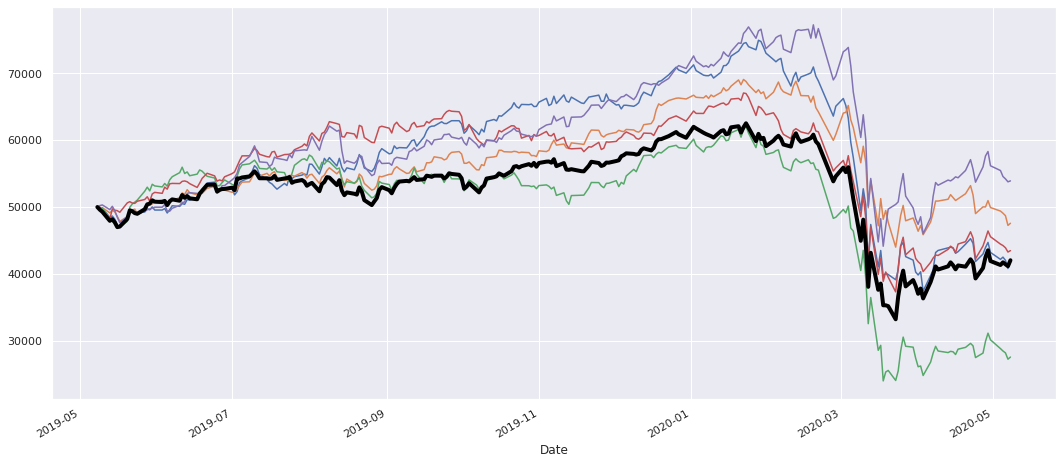

In [49]:
for i in range(5):
  carteira = random.sample(list(dados_yahoo.columns) , k=5)
  carteira = 10000 * retorno_acumulado.loc[: , carteira]
  carteira['saldo'] = carteira.sum(axis=1)
  carteira['saldo'].plot(figsize=(18,8))

(ibov*50000).plot(linewidth=4, color='black')

# 3. ANÁLISE ESTATÍSTICA DA QUEDA DE 12% DO IBOV

In [0]:
from scipy.stats import norm, t

In [51]:
ibov = yf.download('^BVSP')[['Adj Close']]

[*********************100%***********************]  1 of 1 completed


In [52]:
ibov

,Adj Close
Date,
1993-04-27,24.500000
1993-04-28,24.299999
1993-04-29,23.700001
1993-04-30,24.100000
1993-05-03,24.100000
...,...
2020-05-04,78876.000000
2020-05-05,79471.000000
2020-05-06,79064.000000


In [0]:
ibov['retorno'] = ibov['Adj Close'].pct_change()
ibov.dropna(inplace=True)

In [54]:
ibov

,Adj Close,retorno
Date,,
1993-04-28,24.299999,-0.008163
1993-04-29,23.700001,-0.024691
1993-04-30,24.100000,0.016878
1993-05-03,24.100000,0.000000
1993-05-04,24.900000,0.033195
...,...,...
2020-05-04,78876.000000,-0.020247
2020-05-05,79471.000000,0.007543
2020-05-06,79064.000000,-0.005121


In [55]:
media_ibov = ibov['retorno'].mean()
print('Retorno médio = {:.2f}%'.format(media_ibov*100))

Retorno médio = 0.15%


In [56]:
desvio_padrao_ibov = ibov['retorno'].std()
print('Desvio padrão = {:.2f}%'.format(desvio_padrao_ibov*100))

Desvio padrão = 2.28%


In [57]:
ibov[ibov['retorno'] < -0.12]

,Adj Close,retorno
Date,,
1997-10-27,9817.0,-0.149675
1998-09-10,4761.0,-0.158090
2020-03-09,86067.0,-0.121738
2020-03-12,72583.0,-0.147797
2020-03-16,71168.0,-0.139215


In [58]:
probabilidade_teorica = norm.cdf(-0.12, loc = media_ibov, scale=desvio_padrao_ibov)
print('{:.8f}%'.format(probabilidade_teorica*100))

0.00000478%


In [59]:
frequencia_teorica = 1 / probabilidade_teorica
print('Uma vez a cada {} dias'.format(int(round(frequencia_teorica,5))))
print('Ou uma vez a cada {} anos'.format(int(round(frequencia_teorica/252,5))))

Uma vez a cada 20904819 dias
Ou uma vez a cada 82955 anos


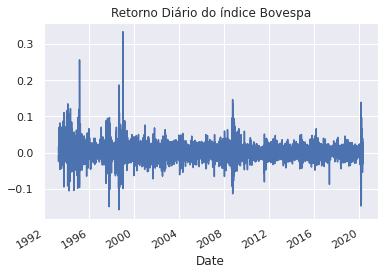

In [60]:
ibov['retorno'].plot(title = 'Retorno Diário do índice Bovespa')

In [0]:
ibov['retorno_teorico'] = norm.rvs(size = ibov['retorno'].size, loc = media_ibov, scale = desvio_padrao_ibov)

(-0.2, 0.4)

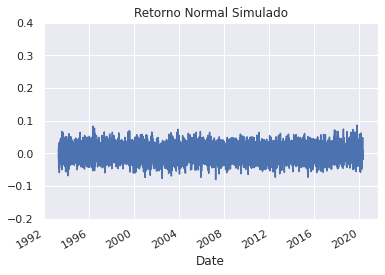

In [62]:
ax = ibov['retorno_teorico'].plot(title = 'Retorno Normal Simulado')
ax.set_ylim(-0.2,0.4)

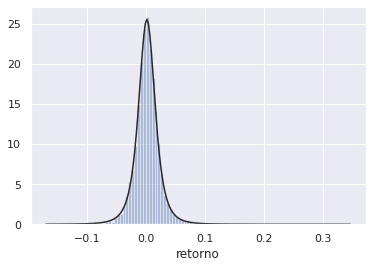

In [63]:
sns.distplot(ibov['retorno'], bins = 100, kde = False, fit = t)

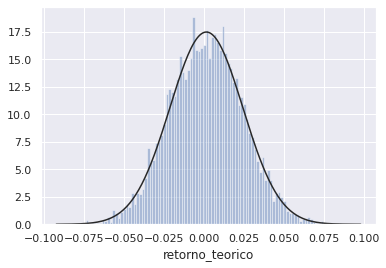

In [64]:
sns.distplot(ibov['retorno_teorico'], bins = 100, kde = False, fit = norm)

In [65]:
(graus_de_liberdade, media_t, desvio_padrao_t) = t.fit(ibov['retorno'])
print('Distribuição T-Student\nGraus de liberdade = {:.2f} \nMédia={:.4f} \nDesvio padrão={:.5f}'.format(graus_de_liberdade,media_t,desvio_padrao_t) )

Distribuição T-Student
Graus de liberdade = 3.23 
Média=0.0012 
Desvio padrão=0.01447


In [66]:
probabilidade_teorica_t = t.cdf(-0.12, graus_de_liberdade,  loc=media_t, scale=desvio_padrao_t)
print('{:.8f}%'.format(probabilidade_teorica_t*100))

0.13405191%


In [67]:
frequencia_teorica_t = 1 / probabilidade_teorica_t
print('Para uma distribuição T-Student: \nUma vez a cada {} dias'.format(int(round(frequencia_teorica_t, 5))))
print('Ou uma vez a cada {} anos'.format(int(round(frequencia_teorica_t/252, 5))))

Para uma distribuição T-Student: 
Uma vez a cada 745 dias
Ou uma vez a cada 2 anos


In [68]:
frequencia_teorica = 1 / probabilidade_teorica
print('Para uma distribuição Normal: \nUma vez a cada {} dias'.format(int(round(frequencia_teorica, 5))))
print('Ou uma vez a cada {} anos'.format(int(round(frequencia_teorica/252, 5))))

Para uma distribuição Normal: 
Uma vez a cada 20904819 dias
Ou uma vez a cada 82955 anos


In [69]:
frequencia_observada = ibov['retorno'].size / ibov[ibov["retorno"] < -0.12].size 
print('Na vida real aconteceu: \nUma vez a cada {} dias'.format(int(round(frequencia_observada, 5))))

Na vida real aconteceu: 
Uma vez a cada 445 dias


# ANÁLISE DE EMPRESAS COM PYTHON

In [0]:
url = 'http://fundamentus.com.br/resultado.php'
df = pd.read_html(url, decimal = ',', thousands= '.')[0]


In [71]:
df

,Papel,Cotação,P/L,P/VP,PSR,Div.Yield,P/Ativo,P/Cap.Giro,P/EBIT,P/Ativ Circ.Liq,EV/EBIT,EV/EBITDA,Mrg Ebit,Mrg. Líq.,Liq. Corr.,ROIC,ROE,Liq.2meses,Patrim. Líq,Dív.Brut/ Patrim.,Cresc. Rec.5a
0,VNET3,0.00,0.00,0.00,0.000,"0,00%",0.000,0.00,0.00,0.00,0.00,0.00,"0,00%","0,00%",0.00,"0,00%","12,99%",0.00,9.257250e+09,0.00,"-2,71%"
1,CFLU4,1000.00,0.00,0.00,0.000,"0,00%",0.000,0.00,0.00,0.00,0.00,0.00,"8,88%","10,72%",1.10,"17,68%","32,15%",0.00,6.035100e+07,0.06,"8,14%"
2,CLAN3,0.00,0.00,0.00,0.000,"0,00%",0.000,0.00,0.00,0.00,0.00,0.00,"0,00%","0,00%",0.00,"0,00%","-1,05%",0.00,1.012240e+09,0.00,"-63,96%"
3,CLSC6,0.00,0.00,0.00,0.000,"0,00%",0.000,0.00,0.00,0.00,0.00,0.00,"0,00%","0,00%",0.00,"0,00%","22,88%",0.00,1.551160e+09,0.00,"6,66%"
4,CSTB3,150.00,0.00,0.00,0.000,"0,00%",0.000,0.00,0.00,0.00,0.00,0.00,"40,85%","28,98%",2.60,"22,40%","20,11%",0.00,8.420670e+09,0.14,"31,91%"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,UBBR11,14.75,1201.81,3.91,0.000,"0,00%",0.000,0.00,0.00,0.00,0.00,0.00,"0,00%","0,00%",0.00,"0,00%","0,33%",0.00,1.031720e+10,0.00,"10,58%"
882,UBBR3,18.00,1466.61,4.77,0.000,"0,00%",0.000,0.00,0.00,0.00,0.00,0.00,"0,00%","0,00%",0.00,"0,00%","0,33%",0.00,1.031720e+10,0.00,"10,58%"
883,CEPE6,19.30,1491.75,0.86,-17.684,"3,59%",0.161,-9.37,68.89,-0.32,307.50,254.51,"-25,67%","-1,19%",0.95,"0,27%","0,06%",537.14,1.667000e+09,3.36,"8,63%"
884,CEPE3,24.53,1895.99,1.10,-22.477,"0,00%",0.204,-11.91,87.55,-0.41,326.16,269.96,"-25,67%","-1,19%",0.95,"0,27%","0,06%",0.00,1.667000e+09,3.36,"8,63%"


In [0]:
for coluna in ['Div.Yield','Mrg Ebit','Mrg. Líq.','ROIC','ROE','Cresc. Rec.5a']:
  df[coluna] = df[coluna].str.replace('.','')
  df[coluna] = df[coluna].str.replace(',','.')
  df[coluna] = df[coluna].str.rstrip('%').astype('float') / 100

In [73]:
df

,Papel,Cotação,P/L,P/VP,PSR,Div.Yield,P/Ativo,P/Cap.Giro,P/EBIT,P/Ativ Circ.Liq,EV/EBIT,EV/EBITDA,Mrg Ebit,Mrg. Líq.,Liq. Corr.,ROIC,ROE,Liq.2meses,Patrim. Líq,Dív.Brut/ Patrim.,Cresc. Rec.5a
0,VNET3,0.00,0.00,0.00,0.000,0.0000,0.000,0.00,0.00,0.00,0.00,0.00,0.0000,0.0000,0.00,0.0000,0.1299,0.00,9.257250e+09,0.00,-0.0271
1,CFLU4,1000.00,0.00,0.00,0.000,0.0000,0.000,0.00,0.00,0.00,0.00,0.00,0.0888,0.1072,1.10,0.1768,0.3215,0.00,6.035100e+07,0.06,0.0814
2,CLAN3,0.00,0.00,0.00,0.000,0.0000,0.000,0.00,0.00,0.00,0.00,0.00,0.0000,0.0000,0.00,0.0000,-0.0105,0.00,1.012240e+09,0.00,-0.6396
3,CLSC6,0.00,0.00,0.00,0.000,0.0000,0.000,0.00,0.00,0.00,0.00,0.00,0.0000,0.0000,0.00,0.0000,0.2288,0.00,1.551160e+09,0.00,0.0666
4,CSTB3,150.00,0.00,0.00,0.000,0.0000,0.000,0.00,0.00,0.00,0.00,0.00,0.4085,0.2898,2.60,0.2240,0.2011,0.00,8.420670e+09,0.14,0.3191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,UBBR11,14.75,1201.81,3.91,0.000,0.0000,0.000,0.00,0.00,0.00,0.00,0.00,0.0000,0.0000,0.00,0.0000,0.0033,0.00,1.031720e+10,0.00,0.1058
882,UBBR3,18.00,1466.61,4.77,0.000,0.0000,0.000,0.00,0.00,0.00,0.00,0.00,0.0000,0.0000,0.00,0.0000,0.0033,0.00,1.031720e+10,0.00,0.1058
883,CEPE6,19.30,1491.75,0.86,-17.684,0.0359,0.161,-9.37,68.89,-0.32,307.50,254.51,-0.2567,-0.0119,0.95,0.0027,0.0006,537.14,1.667000e+09,3.36,0.0863
884,CEPE3,24.53,1895.99,1.10,-22.477,0.0000,0.204,-11.91,87.55,-0.41,326.16,269.96,-0.2567,-0.0119,0.95,0.0027,0.0006,0.00,1.667000e+09,3.36,0.0863


In [74]:
df.shape

(886, 21)

# Analisando os dados

In [0]:
df = df[df['Liq.2meses'] > 1000000]

In [76]:
df.shape

(198, 21)

In [0]:
ranking = pd.DataFrame()
ranking['pos'] = range(1,151)
ranking['EV/EBIT'] = df[df['EV/EBIT'] > 0].sort_values(by =['EV/EBIT'])['Papel'][:150].values
ranking['ROIC'] = df.sort_values(by =['ROIC'], ascending = False)['Papel'][:150].values

In [78]:
ranking

,pos,EV/EBIT,ROIC
0,1,PSSA3,WIZS3
1,2,SMLS3,PSSA3
2,3,SULA11,TOTS3
3,4,EMBR3,ODPV3
4,5,ENAT3,SMLS3
...,...,...,...
145,146,PNVL3,PRNR3
146,147,GNDI3,JHSF3
147,148,EZTC3,COGN3
148,149,WEGE3,LOGG3


In [0]:
a = ranking.pivot_table(columns = 'EV/EBIT', values = 'pos')
b = ranking.pivot_table(columns = 'ROIC', values = 'pos')

In [80]:
t = pd.concat([a,b])
t

,AALR3,ABEV3,AGRO3,ALPA4,ALSO3,ALUP11,AMAR3,ANIM3,ARZZ3,B3SA3,BEEF3,BKBR3,BRDT3,BRFS3,BRKM5,BRML3,BRPR3,CAML3,CARD3,CCPR3,CCRO3,CEAB3,CESP6,CIEL3,CMIG3,CMIG4,COCE5,COGN3,CPFE3,CPLE3,CPLE6,CRFB3,CSAN3,CSMG3,CSNA3,CVCB3,CYRE3,DIRR3,DTEX3,ECOR3,...,SAPR3,SAPR4,SBSP3,SEER3,SGPS3,SHUL4,SLCE3,SMLS3,SMTO3,SULA11,TASA4,TEND3,TGMA3,TIET11,TIET4,TIMP3,TOTS3,TRIS3,TRPL4,TUPY3,UCAS3,UGPA3,UNIP6,USIM3,USIM5,VALE3,VIVA3,VIVT3,VIVT4,VLID3,VULC3,VVAR3,WEGE3,WIZS3,WSON33,YDUQ3,HAPV3,LWSA3,MGLU3,PRNR3
pos,95.0,91.0,89.0,142.0,87.0,9.0,17.0,144.0,135.0,139.0,44.0,105.0,93.0,86.0,108.0,63.0,125.0,118.0,64.0,80.0,78.0,56.0,114.0,29.0,13.0,15.0,70.0,131.0,71.0,30.0,35.0,69.0,107.0,37.0,39.0,7.0,101.0,22.0,130.0,65.0,...,14.0,10.0,40.0,42.0,110.0,88.0,84.0,2.0,117.0,3.0,100.0,12.0,38.0,85.0,81.0,62.0,77.0,36.0,41.0,25.0,83.0,103.0,21.0,51.0,45.0,8.0,132.0,98.0,97.0,27.0,33.0,123.0,149.0,6.0,28.0,79.0,NaN,NaN,NaN,NaN
pos,124.0,16.0,93.0,25.0,143.0,24.0,28.0,125.0,20.0,65.0,10.0,134.0,78.0,92.0,133.0,128.0,150.0,118.0,54.0,122.0,47.0,101.0,139.0,44.0,67.0,66.0,107.0,148.0,42.0,70.0,69.0,36.0,98.0,50.0,49.0,46.0,127.0,120.0,131.0,41.0,...,14.0,13.0,40.0,55.0,NaN,100.0,74.0,5.0,117.0,99.0,96.0,23.0,8.0,30.0,29.0,85.0,3.0,45.0,58.0,51.0,64.0,109.0,43.0,129.0,130.0,18.0,37.0,110.0,111.0,84.0,53.0,126.0,12.0,1.0,27.0,17.0,83.0,77.0,75.0,146.0


In [81]:
rank = t.dropna(axis=1).sum()
rank

AALR3     219.0
ABEV3     107.0
AGRO3     182.0
ALPA4     167.0
ALSO3     230.0
          ...  
VVAR3     249.0
WEGE3     161.0
WIZS3       7.0
WSON33     55.0
YDUQ3      96.0
Length: 145, dtype: float64

In [82]:
rank.sort_values()[:15]

PSSA3      3.0
SMLS3      7.0
WIZS3      7.0
SAPR4     23.0
VALE3     26.0
SAPR11    26.0
SAPR3     28.0
LEVE3     29.0
ALUP11    33.0
TEND3     35.0
GOLL4     38.0
MRFG3     42.0
AMAR3     45.0
TGMA3     46.0
CVCB3     53.0
dtype: float64

# Como acessar a base de dados do BACEN

In [0]:
def consulta_bc(codigo_bcb):
  url = 'http://api.bcb.gov.br/dados/serie/bcdata.sgs.{}/dados?formato=json'.format(codigo_bcb)
#Alterando o que vem depois do sgs. com o respectivo código obtemos as bases
  df = pd.read_json(url)
# Trnasformando para datetime
  df['data'] = pd.to_datetime(df['data'],dayfirst=True)
  df.set_index('data', inplace = True)
  return df



In [0]:
ipca = consulta_bc(433)

In [85]:
ipca

,valor
data,
1980-01-01,6.62
1980-02-01,4.62
1980-03-01,6.04
1980-04-01,5.29
1980-05-01,5.70
...,...
2019-12-01,1.15
2020-01-01,0.21
2020-02-01,0.25


In [86]:
igpm = consulta_bc(189)
igpm

,valor
data,
1989-06-01,19.68
1989-07-01,35.90
1989-08-01,36.92
1989-09-01,39.92
1989-10-01,40.64
...,...
2019-12-01,2.09
2020-01-01,0.48
2020-02-01,-0.04


In [87]:
selic_meta = consulta_bc(432)
selic_meta

,valor
data,
1999-03-05,45.0
1999-03-06,45.0
1999-03-07,45.0
1999-03-08,45.0
1999-03-09,45.0
...,...
2020-06-13,3.0
2020-06-14,3.0
2020-06-15,3.0


In [88]:
reservas_internacionais = consulta_bc(13621)
reservas_internacionais

,valor
data,
1998-09-01,65969
1998-09-02,63083
1998-09-03,61984
1998-09-04,60702
1998-09-08,59449
...,...
2020-04-30,339317
2020-05-04,338961
2020-05-05,342666


In [89]:
pnad = consulta_bc(24369)
pnad

,valor
data,
2012-03-01,7.9
2012-04-01,7.7
2012-05-01,7.6
2012-06-01,7.5
2012-07-01,7.4
...,...
2019-11-01,11.2
2019-12-01,11.0
2020-01-01,11.2


# CDI vs IBOV

In [90]:
ibov = yf.download(tickers = '^BVSP')[['Adj Close']]

[*********************100%***********************]  1 of 1 completed


In [0]:
ibov_retorno = ibov.pct_change()

In [0]:
inicio = '2015-01-01'

In [0]:
ibov_retorno_acumulado = (1+ibov_retorno[ibov_retorno.index >= inicio]).cumprod()
ibov_retorno.iloc[0] = 1

In [94]:
cdi  = consulta_bc(12)
cdi

,valor
data,
1986-03-06,0.068111
1986-03-10,0.069028
1986-03-12,0.067417
1986-03-14,0.064584
1986-03-17,0.068222
...,...
2020-04-30,0.014227
2020-05-04,0.014227
2020-05-05,0.014227


In [0]:
cdi_acumulado = (1 + cdi[cdi.index >= inicio] / 100).cumprod()
cdi_acumulado.iloc[0] = 1

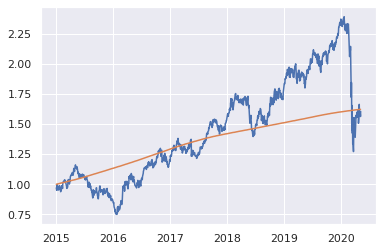

In [96]:
fig, ax = plt.subplots()
ax.plot(ibov_retorno_acumulado)
ax.plot(cdi_acumulado)

# ACESSANDO DADOS DO INVESTING.COM COM PYTHON

In [97]:
# biblioteca para utilizar os dados da investing.com

!pip install investpy

     |████████████████████████████████| 4.4MB 2.8MB/s 
     |████████████████████████████████| 245kB 35.7MB/s 
     |████████████████████████████████| 5.8MB 27.8MB/s 
  Created wheel for investpy: filename=investpy-0.9.14-cp36-none-any.whl size=4469457 sha256=38bd0428265281eb213dfe0b0342cd85bba8020a7b8f98e2a51282fb64e7d0b8
  Stored in directory: /root/.cache/pip/wheels/86/35/ee/fc38f22f1353037b5118cff64b62aeed42f63f2c84135eaaaa
Successfully built investpy
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [0]:
import investpy as inv

# Fundos de Investimento

In [99]:
fundos_br = inv.get_funds_list(country='brazil')
fundos_br

['Fundo De Investimento Multimercado Bordeaux Iv Crédito Privado Investimento No Exterior',
 'Cshg Warrior V Fundo De Investimento Multimercado - Crédito Privado Investimento No Exterior',
 'A3 Viking Fi Em Quotas De Fi Multimercado Crédito Privado Investimento No Exterior',
 'Bb Espelho Multimercado Lp J. Safra Absoluto 30 Private Fic Fi',
 'Ctm Hedge Fundo De Investimento Multimercado - Longo Prazo',
 'Vif - Fundo De Investimento Em Cotas De Fundos De Investimento Multimercado',
 'Fundo De Investimento Multimercado Bordeaux Iii Crédito Privado Investimento No Exterior',
 'Bb Top Tatico Fundo De Investimento Multimercado',
 'Epm Fundo De Investimento Multimercado Crédito Privado Investimento No Exterior',
 'Western Asset Multitrading H Multimercado Fundo De Investimento',
 'Concordia Phoenix Fundo De Investimento Multimercado Crédito Privado',
 'Fundo De Investimento Multimercado Irmb Crédito Privado - Investimento No Exterior',
 'Wm Multigestor Estratégia Fundo De Investimento Em Cot

In [100]:
len(fundos_br)

5200

In [101]:
fundos_br[:5]

['Fundo De Investimento Multimercado Bordeaux Iv Crédito Privado Investimento No Exterior',
 'Cshg Warrior V Fundo De Investimento Multimercado - Crédito Privado Investimento No Exterior',
 'A3 Viking Fi Em Quotas De Fi Multimercado Crédito Privado Investimento No Exterior',
 'Bb Espelho Multimercado Lp J. Safra Absoluto 30 Private Fic Fi',
 'Ctm Hedge Fundo De Investimento Multimercado - Longo Prazo']

In [102]:
pesq = inv.search_funds(by='name', value='alaska black')
pesq

,country,name,symbol,issuer,isin,asset_class,currency,underlying
0,brazil,Alaska Black Fundo De Investimento Em Cotas De...,0P0000U9BK,Alaska Investimentos LTDA.,BRSKP7CTF008,other,BRL,NaN
1,brazil,Alaska Black Master Fundo De Investimento Em A...,0P0000U9BJ,Alaska Investimentos LTDA.,BRSKI1CTF000,other,BRL,NaN
2,brazil,Alaska Black Fundo De Investimento Em Cotas De...,0P00019LLR,Alaska Investimentos LTDA.,BRALK5CTF006,equity,BRL,NaN
3,brazil,Alaska Black Institucional Fundo De Investimen...,0P00019X6E,Alaska Investimentos LTDA.,BRASK4CTF002,equity,BRL,NaN
4,brazil,Alfa Alaska Black Institucional - Fundo De Inv...,0P0001CF6A,Banco Alfa Investimentos SA,BRLSK1CTF005,equity,BRL,NaN


In [103]:
pesq['name'][0]

'Alaska Black Fundo De Investimento Em Cotas De Fundos De Investimento Em Ações - Bdr Nível I'

In [0]:
fundo = 'Alaska Black Fundo De Investimento Em Cotas De Fundos De Investimento Em Ações - Bdr Nível I'

In [105]:
alaska = inv.get_fund_historical_data(fundo,country='brazil', from_date = '01/01/1900',to_date = '08/05/2020')['Close']
alaska

Date
2011-01-25    0.999
2011-01-26    0.991
2011-01-27    0.977
2011-01-28    0.956
2011-01-31    0.953
              ...  
2020-04-30    1.830
2020-05-04    1.797
2020-05-05    1.777
2020-05-06    1.785
2020-05-07    1.762
Name: Close, Length: 2325, dtype: float64

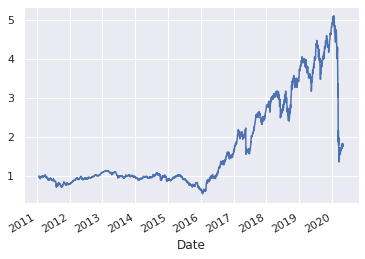

In [106]:
alaska.plot()

In [107]:
 inv.get_etfs_overview(country='brazil')

,country,name,full_name,symbol,last,change,turnover,currency
0,brazil,Ishares Ibovespa,Ishares Ibovespa,BOVA11,77.43,+2.69%,10910000,BRL
1,brazil,It Now Ibovespa Fundo De Indice,It Now Ibovespa Fundo De Indice,BOVV11,80.75,+2.87%,960450,BRL
2,brazil,Fundo de Invest Ishares SP 500,Fundo de Investimento Ishares S&P 500,IVVB11,180.75,-1.23%,629300,BRL
3,brazil,It Now Small Cap Fundo de indice,It Now Small Cap Fundo de Índice,SMAC11,43.89,+1.29%,575130,BRL
4,brazil,ETF Bradesco Ibovespa Fdo De Indice,ETF Bradesco Ibovespa Fundo de Índice,BOVB11,80.26,+2.77%,417510,BRL
5,brazil,iShares BM&FBOVESPA Small Cap,iShares BM&FBOVESPA Small Cap,SMAL11,84.10,+0.12%,295300,BRL
6,brazil,It Now IDIV,It Now IDIV,DIVO11,47.00,+0.51%,239410,BRL
7,brazil,It Now PIBB IBrX-50,It Now PIBB IBrX-50,PIBB11,134.44,+2.74%,116740,BRL
8,brazil,It Now SP500 TRN,It Now S&P500 TRN,SPXI11,176.80,-0.20%,100180,BRL
9,brazil,XP MALLS FDO INV IMOB FII,XP MALLS FDO INV IMOB FII,XPML11,90.55,-0.78%,39600,BRL


In [0]:
bova11 = inv.get_etf_historical_data('Ishares Ibovespa',country ='brazil', from_date='01/01/1900', to_date = '08/05/2020' )['Close']

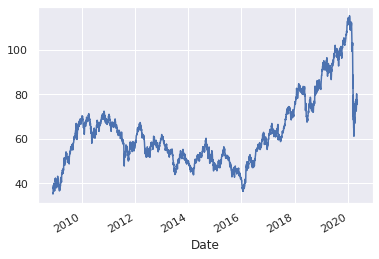

In [109]:
bova11.plot()

# índices

In [110]:
inv.get_indices_list('brazil')

['MSCI Brazil Net USD',
 'DJ Brazil',
 'TR Brazil 50',
 'MSCI Brazil Price USD',
 'DJ Brazil Titans 20 ADR',
 'BNY Mellon Brazil ADR',
 'BNY Mellon Brazil ADR TR',
 'BNY Mellon Brazil Classic ADR',
 'BNY Mellon Brazil Classic ADR TR',
 'FTSE RAFI Brazil 50',
 'MSCI Brazil 10 40',
 'DJ BRIC Brazil 15 Capped NTR',
 'DJ BRIC Brazil 15 USD',
 'DJ BRIC Brazil 15 EUR',
 'FTSE Brazil Infrastructure Extended',
 'MSCI Brazil Gross',
 'DJ Brazil Titans 20 ADR TR',
 'MSCI Brazil 25-50 Price',
 'MSCI Brazil 20-50 Gross Return',
 'MSCI Brazil 25-50 Net Return',
 'FTSE Brazil Infrastructure Extended USD PR',
 'FTSE Brazil Infrastructure Extended Total Return',
 'FTSE Brazil Infrastructure Extended Net Tax Total',
 'FTSE Brazil Infrastructure Extended Net Tax USD TR',
 'DJ BRIC Brazil 15 DR',
 'MSCI Brazil',
 'BM&FBOVESPA Unsponsored BDRX',
 'Small Cap Index',
 'Tag Along',
 'Brazil broad-Based',
 'Brazil Index',
 'Mid-Large Cap Index',
 'Public Utilities',
 'BM&FBOVESPA Real Estate IFIX',
 'Financia

In [111]:
inv.get_index_recent_data('Bovespa', country ='Brazil')

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2020-04-13,77681.94,78835.82,76405.36,78835.82,7651293,BRL
2020-04-14,78847.67,81667.81,78847.67,79918.36,8593606,BRL
2020-04-15,79911.33,80034.78,77545.67,78831.46,9758433,BRL
2020-04-16,78836.72,80167.22,77452.36,77811.85,9028399,BRL
2020-04-17,77817.46,79846.43,77754.45,78990.29,8317760,BRL
2020-04-20,78988.64,80105.99,76942.89,78972.76,8874705,BRL
2020-04-22,78972.83,81183.73,78972.76,80687.15,9848913,BRL
2020-04-23,80690.35,81933.50,78621.92,79673.30,10823453,BRL
2020-04-24,79666.62,79666.62,72040.82,75330.61,16529162,BRL


In [112]:
ibov = inv.get_index_historical_data('Bovespa',country = 'brazil', from_date = '01/01/1900', to_date = '08/05/2020')
ibov

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2000-12-27,14804.50,15222.92,14804.50,15186.15,239975392,BRL
2000-12-28,15188.21,15269.30,15132.06,15259.29,324256128,BRL
2001-01-02,15242.11,15621.41,15173.61,15425.34,230631104,BRL
2001-01-03,15425.41,16599.42,15251.12,16599.42,381195200,BRL
2001-01-04,16596.78,16933.39,16586.85,16675.06,331230784,BRL
...,...,...,...,...,...,...
2020-05-04,80501.17,80501.65,77640.22,78876.22,8594170,BRL
2020-05-05,78887.12,81065.90,78886.34,79470.78,9154697,BRL
2020-05-06,79472.78,79996.04,78055.82,79063.68,9775856,BRL


In [113]:
ibov_dolarizado = inv.get_index_historical_data('Ibovespa USD', country='brazil', from_date = '01/01/1900', to_date = '08/05/2020')
ibov_dolarizado

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2018-02-19,26107.97,26268.69,26107.97,26201.34,2153492,BRL
2018-02-20,26218.10,26550.05,25925.54,26317.45,4204220,BRL
2018-02-21,26400.40,26839.02,26361.47,26368.51,4964374,BRL
2018-02-22,26437.20,26742.46,26402.32,26588.26,3645050,BRL
2018-02-23,26598.55,26902.36,26576.62,26860.11,4307772,BRL
...,...,...,...,...,...,...
2020-05-04,15320.86,15320.86,13911.27,14229.36,8594170,BRL
2020-05-05,15320.86,15320.86,14252.78,14252.93,9154697,BRL
2020-05-06,15320.86,15320.86,13773.74,13838.28,9775856,BRL


In [114]:
ifix = inv.get_index_historical_data('BM&FBOVESPA Real Estate IFIX', country = 'brazil', from_date='01/01/1900', to_date = '08/05/2020')
ifix

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2013-01-10,1587.96,1590.77,1584.30,1589.87,0,BRL
2013-01-11,1589.87,1590.03,1583.66,1587.21,0,BRL
2013-01-14,1587.22,1588.46,1582.70,1584.45,0,BRL
2013-01-15,1584.96,1587.13,1581.59,1583.76,0,BRL
2013-01-16,1583.76,1584.76,1578.58,1583.12,0,BRL
...,...,...,...,...,...,...
2020-05-04,2603.55,2603.55,2571.03,2582.49,0,BRL
2020-05-05,2582.54,2600.12,2582.54,2587.55,0,BRL
2020-05-06,2587.55,2599.63,2584.41,2586.36,0,BRL


In [0]:
indices = pd.DataFrame()
data_inicio = ifix.index[0]

indices['ifix'] = ifix['Close'] / ifix['Close'].loc[data_inicio]

indices['ibov'] = ibov['Close'] / ibov['Close'].loc[data_inicio]

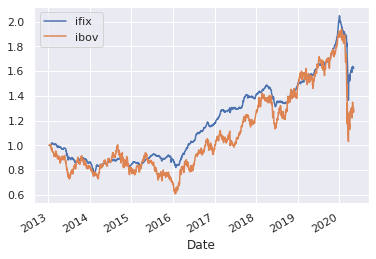

In [116]:
indices.plot()

# Curva da Juros

In [0]:
bondsBR = inv.get_bonds_list('brazil')

In [6]:
bondsBR

['Brazil 3M',
 'Brazil 6M',
 'Brazil 9M',
 'Brazil 1Y',
 'Brazil 2Y',
 'Brazil 3Y',
 'Brazil 5Y',
 'Brazil 8Y',
 'Brazil 10Y']

In [0]:
bonds_overview = inv.get_bonds_overview('brazil')

In [8]:
bonds_overview

,country,name,last,last_close,high,low,change,change_percentage
0,brazil,Brazil 3M,2.795,2.810,2.810,2.800,-0.015,-0.53%
1,brazil,Brazil 6M,2.535,2.540,2.590,2.540,-0.005,-0.20%
2,brazil,Brazil 9M,2.573,2.595,2.625,2.575,-0.022,-0.87%
3,brazil,Brazil 1Y,2.750,2.780,2.845,2.765,-0.030,-1.08%
4,brazil,Brazil 2Y,3.618,3.620,3.660,3.620,-0.003,-0.07%
5,brazil,Brazil 3Y,5.096,5.155,5.215,5.125,-0.059,-1.14%
6,brazil,Brazil 5Y,6.182,6.225,6.350,6.210,-0.043,-0.69%
7,brazil,Brazil 8Y,7.121,7.165,7.295,7.150,-0.044,-0.61%
8,brazil,Brazil 10Y,7.622,7.710,7.790,7.660,-0.088,-1.14%


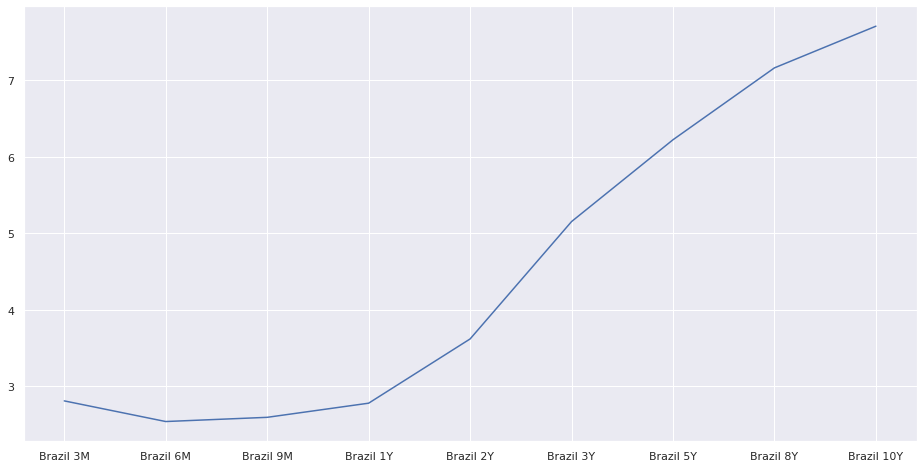

In [9]:
import seaborn as sns; sns.set()
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.figsize'] = (16,8)
plt.plot(bondsBR, bonds_overview['last_close'])


In [11]:
data_inicio = '01/01/2010'
data_fim = '08/05/2020'

um_ano =  inv.get_bond_historical_data('Brazil 1Y', from_date = data_inicio, to_date = data_fim)
um_ano

,Open,High,Low,Close
Date,,,,
2010-01-04,11.040,11.416,11.010,11.360
2010-01-05,11.370,11.400,11.310,11.320
2010-01-06,11.350,11.350,11.270,11.295
2010-01-07,11.275,11.416,11.270,11.416
2010-01-08,11.285,11.416,11.205,11.205
...,...,...,...,...
2020-05-04,3.099,3.179,3.099,3.134
2020-05-05,3.099,3.099,2.997,2.997
2020-05-06,2.999,3.036,2.999,3.036


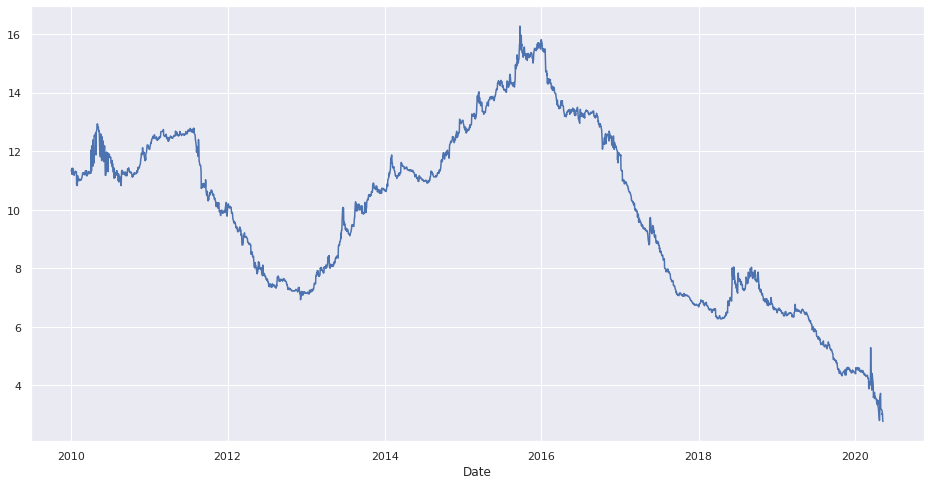

In [12]:
um_ano['Close'].plot()

In [0]:
data_inicio = '01/01/2010'
data_fim = '08/05/2020'
bonds = pd.DataFrame()

for prazo in bondsBR:
  bonds[prazo] =  inv.get_bond_historical_data(prazo, from_date = data_inicio, to_date = data_fim)['Close']


In [15]:
bonds

,Brazil 3M,Brazil 6M,Brazil 9M,Brazil 1Y,Brazil 2Y,Brazil 3Y,Brazil 5Y,Brazil 8Y,Brazil 10Y
Date,,,,,,,,,
2010-01-04,8.680,9.170,10.475,11.360,11.910,12.700,12.740,NaN,NaN
2010-01-05,8.670,9.170,10.445,11.320,11.890,12.740,12.740,NaN,NaN
2010-01-06,8.670,9.140,10.330,11.295,11.820,12.750,12.740,NaN,NaN
2010-01-07,8.700,9.140,10.330,11.416,11.264,12.770,12.770,NaN,NaN
2010-01-08,8.650,9.110,10.300,11.205,11.770,12.760,12.760,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2020-05-04,3.085,2.870,2.943,3.134,4.108,5.606,6.494,7.278,7.650
2020-05-05,3.024,2.793,2.828,2.997,3.892,5.339,6.292,7.154,7.603
2020-05-06,3.023,2.820,2.855,3.036,3.932,5.347,6.307,7.188,7.628


In [0]:
bonds.index = pd.to_datetime(bonds.index)

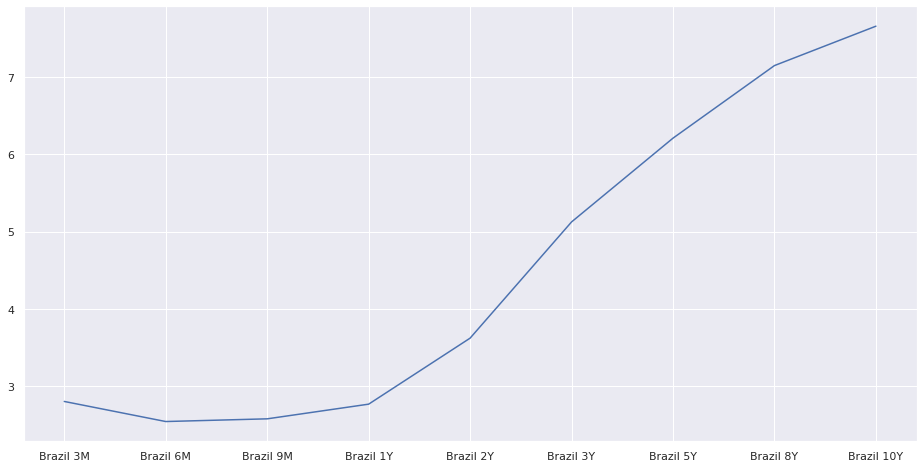

In [22]:
plt.plot(bondsBR, bonds.loc['2020-05-08'])

In [0]:
import plotly.graph_objects as go

In [0]:
# fig = go.Figure()

# for i in bonds.index:
#   fig.add_trace(go.Scatter(x=bondsBR, y = bonds.loc[i], mode = 'lines', name = str(i)))

# fig.show()

In [0]:
data_inicio = '01/01/2010'
data_fim = '08/05/2020'
bondsMensal = pd.DataFrame()

for prazo in bondsBR:
  bondsMensal[prazo] =  inv.get_bond_historical_data(prazo, from_date = data_inicio, to_date = data_fim, interval='Monthly')['Close']

In [34]:
fig = go.Figure()

for i in bondsMensal.index:
  fig.add_trace(go.Scatter(x=bondsBR, y = bondsMensal.loc[i], mode = 'lines', name = str(i), visible = False))

fig.data[0].visible = True
steps = []

for i in range(len(fig.data)):
  step = dict(
      method = 'restyle',
      args = ['visible',[False]*len(fig.data)],
      label = fig.data[i]['name'][:7]

  )

  step['args'][1][i] = True
  steps.append(step)

sliders = [dict(
    active = 0,
    currentvalue = {'prefix':'Mês: '},
    pad ={'t':50},
    steps = steps

)]

fig.update_layout(
    sliders = sliders,
    yaxis = dict(range = [3,14.5])
)

fig.show()

In [0]:
selic_meta = consulta_bc(432)

In [0]:
s2015 = selic_meta[selic_meta.index.year >= 2015]
b2015 = bonds[bonds.index.year >= 2015]

In [39]:
s2015

,valor
data,
2015-01-01,11.75
2015-01-02,11.75
2015-01-03,11.75
2015-01-04,11.75
2015-01-05,11.75
...,...
2020-06-13,3.00
2020-06-14,3.00
2020-06-15,3.00


In [43]:
fig = go.Figure()

for i in bondsBR:
  fig.add_trace(go.Scatter(x=b2015.index, y = b2015[i], mode = 'lines', name = str(i)))

fig.add_trace(go.Scatter(x=s2015.index, y = s2015['valor'], mode = 'lines', name = 'SELIC', line = {'color':'black'}))

fig.show()